In [1]:
import anal as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

import locale
locale.setlocale(locale.LC_ALL, 'de_DE.utf8')
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
f = pm.ferh_fm_zeynab()
f.df

set                                                obj  wavelength  \
0    0460_L  <anal.file_import.SetRotmld o...         460   
1    0530_L  <anal.file_import.SetRotmld o...         530   
2    0620_L  <anal.file_import.SetRotmld o...         620   
3    0710_H  <anal.file_import.SetRotmld o...         710   
4    0710_L  <anal.file_import.SetRotmld o...         710   
5    0810_L  <anal.file_import.SetRotmld o...         810   
6    0920_L  <anal.file_import.SetRotmld o...         920   
7    1050_H  <anal.file_import.SetRotmld o...        1050   
8    1050_L  <anal.file_import.SetRotmld o...        1050   
9    1200_L  <anal.file_import.SetRotmld o...        1200   
10   1400_L  <anal.file_import.SetRotmld o...        1400   
11   1600_H  <anal.file_import.SetRotmld o...        1600   
12  1600_HR  <anal.file_import.SetRotmld o...        1600   
13   1600_L  <anal.file_import.SetRotmld o...        1600   
14  1600_LR  <anal.file_import.SetRotmld o...        1600   

   flags  sample_rotation  hext  
0      L                0    50  
1      L                0    50  
2      L                0    50  
3      H                0   207  
4      L                0    50  
5      L                0    50  
6      L                0    50  
7      H                0   207  
8      L                0    50  
9      L                0    50  
10     L                0    50  
11     H                0   207  
12    HR              -90   207  
13     L                0    50  
14    LR              -90    50

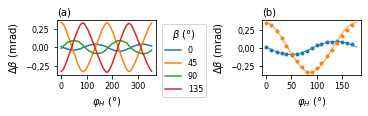

In [4]:
ms = 2.5
lw = 0.8
mk = '.'

g = f[13]
g.load()

for gg in g:
    gg.preprocess(symmetrize_h = False)


g.collect_merge()

# kresleni
##########

fig, (ax, ax2) = plt.subplots(1,2, figsize=(5,1.5), constrained_layout=True)
phih = g.data['phih']

ax.plot(phih, g.data[0.], color='C0', label='0')
ax.plot(phih, g.data[45.], color='C1', label='45')
ax.plot(phih, g.data[90.], color='C2', label='90')
ax.plot(phih, g.data[135.], color='C3', label='135')

ax.legend(title=r'$\beta$ ($\degree$)', bbox_to_anchor=(1.02,1))
ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')
ax.text(0, 1.1, "(a)", transform=ax.transAxes)

A = pd.DataFrame({'phih':phih,
                 '0':g.data[0.],
                 '45':g.data[45.],
                 '90':g.data[90.],
                 '135':g.data[135.]})
A.to_csv('out-nemec/5_09/a.csv')

# druhy graf
######
g = f[13]
g.load()
g.preprocess()
g.collect_merge()
g.symmetrize_beta()
g.fourier2_beta()
g.analyze()

phih = g.data['phih']

ax2.plot(phih.iloc[::2], g.data.iloc[::2][0.], mk, color='C0', label='0')
ax2.plot(phih.iloc[::2], g.data.iloc[::2][45.], mk, color='C1', label='45')

ax2.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax2.set_ylabel(r'$\Delta\beta$ (mrad)')
ax2.text(0, 1.1, "(b)", transform=ax2.transAxes)


phihdense = np.linspace(0,180,num=50)
phimdense = np.array(g.fit_anisotropy.free_energy.phih2phim(np.radians(phihdense), hext=207))
df = pd.DataFrame({'phih':phihdense,'phim':phimdense})

c2m = np.cos(2*phimdense)
s2m = np.sin(2*phimdense)

ax2.plot(phihdense, g.fit_anisotropy.pmldfit.results[0].params[0]
         +c2m*g.fit_anisotropy.pmldfit.results[0].params[1]
         +s2m*g.fit_anisotropy.pmldfit.results[0].params[2],
         color='C0', linewidth=lw)
ax2.plot(phihdense, g.fit_anisotropy.pmldfit.results[1].params[0]
         +c2m*g.fit_anisotropy.pmldfit.results[1].params[1]
         +s2m*g.fit_anisotropy.pmldfit.results[1].params[2],
         color='C1', linewidth=lw)

B1 = pd.DataFrame({'phih':phih,
                   '0':g.data[0.],
                   '45':g.data[45.]})
B1.to_csv('out-nemec/5_09/b_data.csv')
B2 = pd.DataFrame({'phih':phihdense,
                   '0':g.fit_anisotropy.pmldfit.results[0].params[0]+c2m*g.fit_anisotropy.pmldfit.results[0].params[1]+s2m*g.fit_anisotropy.pmldfit.results[0].params[2],
                   '45':g.fit_anisotropy.pmldfit.results[1].params[0]+c2m*g.fit_anisotropy.pmldfit.results[1].params[1]+s2m*g.fit_anisotropy.pmldfit.results[1].params[2]})
B2.to_csv('out-nemec/5_09/b_fit.csv')

fig.savefig('out/ferh-data.pdf')